In [82]:
!pip install scikit-posthocs
!pip install scikit-posthocs --quiet

In [83]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import chi2_contingency
from itertools import combinations
import gzip
import requests
from io import BytesIO

# <span style="color:#e31c5e"> 💾 Cargar Dataset </span>

In [84]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature-eda-cleaning/data/airbnb_cleaned.csv.gz"


def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(f)

        print(f"✅ Data downloaded succesfully!")

        return df

    except Exception as e:
        print(f"❌ Error while downloading data: {e}")
        return None
# Creating dataframe from GitHub URL
df = load_airbnb_data_from_github(GITHUB_CLEAN_URL)

🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!


# <span style="color:#e31c5e"> 🧾 Información dataset </span>

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id_announcement                 220031 non-null  int64  
 1   title_announcement              220031 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       220031 non-null  object 
 4   city                            220031 non-null  object 
 5   neighbourhood_group             220031 non-null  object 
 6   neighbourhood                   220031 non-null  object 
 7   latitude                        220031 non-null  float64
 8   longitude                       220031 non-null  float64
 9   room_type                       220031 non-null  object 
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  int64  
 12  reviews_per_mont

## <span style="color:#b6164b"> Diccionario de Variables </span>

| Nº  | Variable                        | Descripción                                      |
|-----|---------------------------------|--------------------------------------------------|
| 0   | `id_announcement`               | ID único del anuncio                             |
| 1   | `title_announcement`            | Título del anuncio publicado                     |
| 2   | `host_id`                       | ID del anfitrión                                 |
| 3   | `host_name`                     | Nombre del anfitrión                             |
| 4   | `city`                          | Ciudad donde se encuentra el alojamiento         |
| 5   | `neighbourhood_group`          | Agrupación administrativa o general del barrio   |
| 6   | `neighbourhood`                | Barrio específico del alojamiento                |
| 7   | `latitude`                      | Latitud geográfica del alojamiento               |
| 8   | `longitude`                     | Longitud geográfica del alojamiento              |
| 9   | `room_type`                     | Tipo de habitación (entera, compartida, etc.)    |
| 10  | `minimum_nights`               | Número mínimo de noches de estadía               |
| 11  | `number_of_reviews`            | Número total de reseñas del anuncio              |
| 12  | `reviews_per_month`            | Reseñas promedio por mes                         |
| 13  | `calculated_host_listings_count` | Número de anuncios del mismo anfitrión         |
| 14  | `availability_365`             | Días disponibles al año para reservar            |
| 15  | `price_USD`                    | Precio por noche en dólares estadounidenses (USD)|


## <span style="color:#E31C5E"> ⭕ Comprobar valores nulos </span>

In [86]:
df.isnull().sum()

,0
id_announcement,0
title_announcement,0
host_id,0
host_name,0
city,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0


## <span style="color:#E31C5E"> 📊 Análisis estadístico descriptivo </span>

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_announcement,220031.0,2.240831e+07,1.175490e+07,2539.000000,1.338370e+07,2.249789e+07,3.155445e+07,5.095505e+07
host_id,220031.0,8.494528e+07,8.856607e+07,1944.000000,1.439602e+07,4.640392e+07,1.415097e+08,4.117208e+08
latitude,220031.0,3.257305e+01,3.014485e+01,-34.135212,4.041262e+01,4.079424e+01,5.149620e+01,5.168169e+01
longitude,220031.0,1.642814e+01,7.603047e+01,-74.244420,-3.705870e+00,-1.283800e-01,9.199535e+00,1.513398e+02
minimum_nights,220031.0,5.258023e+00,2.011826e+01,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,1.250000e+03
number_of_reviews,220031.0,2.012916e+01,4.301228e+01,0.000000,1.000000e+00,4.000000e+00,1.900000e+01,8.960000e+02
reviews_per_month,220031.0,9.448189e-01,1.430133e+00,0.000000,0.000000e+00,3.200000e-01,1.290000e+00,5.850000e+01
calculated_host_listings_count,220031.0,1.345005e+01,7.320677e+01,0.000000,1.000000e+00,1.000000e+00,3.000000e+00,9.990000e+02
availability_365,220031.0,1.204035e+02,1.311032e+02,0.000000,0.000000e+00,7.700000e+01,2.250000e+02,3.650000e+02
price_USD,220031.0,1.586122e+02,3.231457e+02,0.000000,6.189000e+01,1.020000e+02,1.729300e+02,1.707876e+04


**Registros:** 220 031 anuncios

### Métricas Clave (mediana y rango)
- **Precio:** 102 USD (0 – 17 079 USD)  
- **Estancia mínima:** 2 noches (1 – 1 250)  
- **Reseñas totales:** 4 (0 – 896)  
- **Disponibilidad anual:** 77 días (0 – 365)  
- **Anuncios/host:** 1 (0 – 999)  

### Hallazgos Principales
- **Precios muy dispersos:** revisar valores 0 USD y > 1 000 USD como posibles errores o casos de lujo.
- **Estancias cortas dominantes:** 75 % acepta ≤ 4 noches.
- **Baja disponibilidad:** la mitad de anuncios ofrece ≤ 77 días/año.

### Recomendaciones
1. Depurar outliers de precio y estancia.  
2. Segmentar análisis por región.  
3. Emplear mediana y percentiles en reportes y modelos.  

## <span style="color:#E31C5E"> ☝ valores unicos </span>

In [88]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

id_announcement: 220031 valores únicos
title_announcement: 213148 valores únicos
host_id: 144510 valores únicos
host_name: 31492 valores únicos
city: 6 valores únicos
neighbourhood_group: 27 valores únicos
neighbourhood: 562 valores únicos
latitude: 98672 valores únicos
longitude: 108328 valores únicos
room_type: 4 valores únicos
minimum_nights: 164 valores únicos
number_of_reviews: 548 valores únicos
reviews_per_month: 1126 valores únicos
last_review: 6783 valores únicos
calculated_host_listings_count: 110 valores únicos
availability_365: 369 valores únicos
price_USD: 3177 valores únicos


### Revisión de Valores Únicos por Columna

Se realizó un análisis de los valores únicos en cada columna del dataset para identificar posibles inconsistencias, errores de codificación o columnas que requieren limpieza.

### Resultados destacados

| Columna                        | Valores únicos | Observación                                                   |
|-------------------------------|----------------|----------------------------------------------------------------|
| `id_announcement`             | 220,031        | ID único por anuncio, correcto.                               |
| `title_announcement`          | 213,147        | Títulos variados; revisar posibles duplicados exactos.        |
| `host_id`                     | 144,510        | Muchos anfitriones distintos.                                 |
| `host_name`                   | 31,496         | Posibles duplicados por nombres similares.                    |
| `city`                        | 6              | Columna limpia y categórica.                                  |
| `neighbourhood_group`         | 27             | Requiere revisión por posibles valores como `"Unknown"`.      |
| `neighbourhood`              | 562            | Alta cardinalidad; revisar por duplicados con diferencias leves. |
| `latitude` / `longitude`      | 98,672 / 108,328 | Georreferenciación extensa, como se espera.                  |
| `room_type`                   | 4              | Columna limpia; verificar si hay inconsistencias de formato.  |
| `minimum_nights`              | 164            | Revisar outliers (ej. estadías mínimas de más de 365 días).   |
| `number_of_reviews`           | 548            | Distribución variada, correcta.                               |
| `reviews_per_month`           | 1,126          | OK. Revisión opcional de valores extremos.                    |
| `calculated_host_listings_count` | 110        | OK, indica cantidad de alojamientos por anfitrión.            |
| `availability_365`            | 369            | Revisar si todos los valores están entre 0 y 365.             |
| `price_USD`                   | 3,177          | Alta dispersión; revisar outliers (valores extremadamente bajos o altos). |

### Resultados clave

- **`city`**: contiene 6 valores únicos → todos correctos (`New York`, `London`, `Milan`, `Tokyo`, `Sydney`, `Madrid`)
- **`room_type`**: contiene 4 valores.
- **`neighbourhood_group`** y **`neighbourhood`**: contienen decenas y cientos de valores únicos → potencial de duplicados semánticos
- **`minimum_nights`**, **`availability_365`**, y **`price_USD`**: tienen distribuciones amplias → revisar posibles valores extremos o errores de carga
- **`reviews_per_month`**: contiene decimales → se puede redondear si se requiere simplificación.

### Recomendaciones
- Inspeccionar y tratar posibles **outliers** en `price_USD` y `minimum_nights`.
- Considerar unificar nombres de barrios o anfitriones similares si se usa en análisis agregados.

# <span style="color:#E31C5E"> 🔎 Análisis estadistico de las variables nuúmericas </span>

## <span style="color:#b6164b"> Centralización (tendencia central) </span>

In [105]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
central = pd.DataFrame({
    'mean':    df[num_cols].mean(),
    'median':  df[num_cols].median(),
    'mode':    df[num_cols].mode().iloc[0]
})
central

,mean,median,mode
id_announcement,2.240831e+07,2.249789e+07,2.539000e+03
host_id,8.494528e+07,4.640392e+07,3.388920e+07
latitude,3.257305e+01,4.079424e+01,4.042165e+01
longitude,1.642814e+01,-1.283800e-01,-3.707000e+00
minimum_nights,5.258023e+00,2.000000e+00,1.000000e+00
number_of_reviews,2.012916e+01,4.000000e+00,0.000000e+00
reviews_per_month,9.448189e-01,3.200000e-01,0.000000e+00
calculated_host_listings_count,1.345005e+01,1.000000e+00,1.000000e+00
availability_365,1.204035e+02,7.700000e+01,0.000000e+00
price_USD,1.586122e+02,1.020000e+02,6.917000e+01


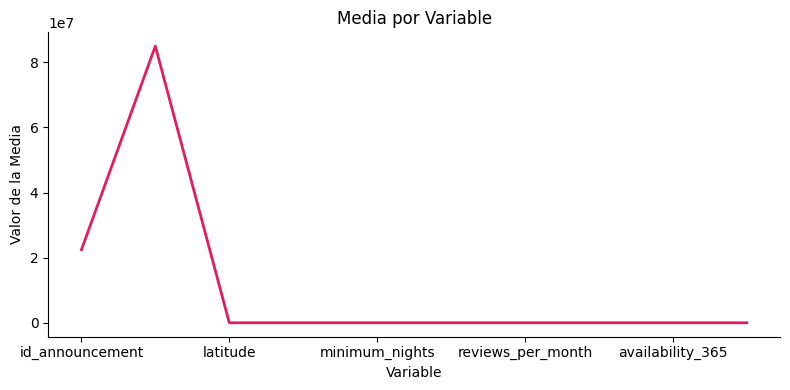

In [90]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
ax = central['mean'].plot(
    kind='line',
    color='#E31C5E',
    linewidth=2,
    title='Media por Variable'
)
# Ocultar spines superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Variable')
ax.set_ylabel('Valor de la Media')
plt.tight_layout()
plt.show()

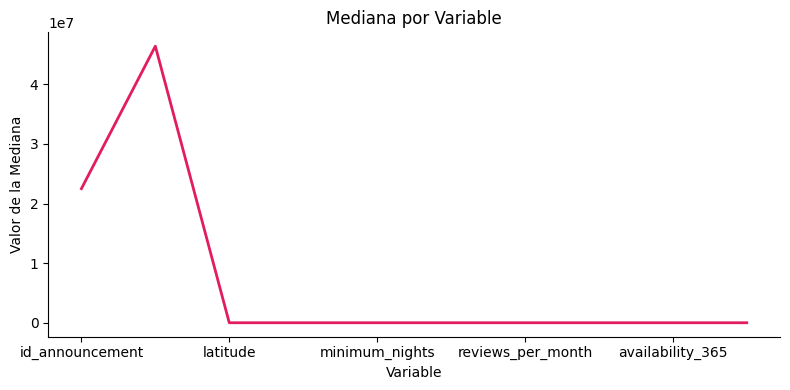

In [91]:
plt.figure(figsize=(8, 4))
ax = central['median'].plot(
    kind='line',
    color='#E31C5E',
    linewidth=2,
    title='Mediana por Variable'
)
# Ocultar spines superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Variable')
ax.set_ylabel('Valor de la Mediana')
plt.tight_layout()
plt.show()

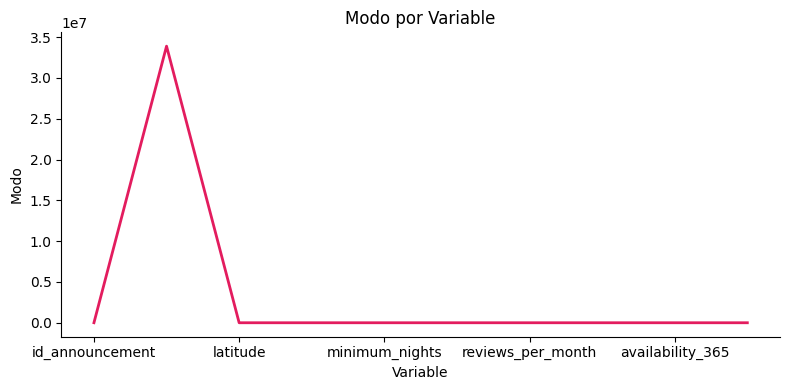

In [92]:
plt.figure(figsize=(8, 4))
ax = central['mode'].plot(
    kind='line',
    color='#E31C5E',
    linewidth=2,
    title='Modo por Variable'
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Variable')
ax.set_ylabel('Modo')
plt.tight_layout()
plt.show()

### Resumen de resultados

| Variable                          | Media             | Mediana           | Moda             | Interpretación clave                                              |
|-----------------------------------|-------------------|-------------------|------------------|-------------------------------------------------------------------|
| **price_USD**                     | 158.6 USD         | 102 USD           | 69.17 USD        | El precio “típico” es 102 USD; el valor más frecuente (≈69 USD) queda por debajo de la mediana. |
| **minimum_nights**                | 5.26 noches       | 2 noches          | 1 noche          | La mayoría acepta estancias muy cortas; la media se ve sesgada por unos pocos valores altos. |
| **number_of_reviews**             | 20.1 reseñas      | 4 reseñas         | 0 reseñas        | El anfitrión “típico” ha recibido 4 reseñas; muchos anuncios aún no han sido reseñados.    |
| **reviews_per_month**             | 0.94              | 0.32              | 0.00             | La actividad mensual es baja para la mayoría; hay algunos con alta frecuencia de reseñas.  |
| **availability_365**              | 120.4 días/año    | 77 días/año       | 0 días/año       | La mitad de los anuncios está libre menos de 77 días; muchos apenas publican disponibilidad. |
| **calculated_host_listings_count**| 13.45 listados    | 1 listado         | 1 listado        | La mayoría de los hosts gestiona un único anuncio; unos pocos muy activos elevan la media. |
| **latitude**                      | 32.57°            | 40.79°            | 40.42°           | El “centro” geográfico cae cerca de Madrid (≈40.4 N), aunque hay valores extremos globales. |
| **longitude**                     | 16.43°            | –0.13°            | –3.71°           | Similar a la latitud: la mediana y el modo apuntan a ubicaciones en torno a España. |

> **Observación general:**  
> - La **mediana** es más representativa que la media cuando la distribución está sesgada (p.ej. precios, mínima de noches, número de reseñas).  
> - El **modo** confirma la existencia de muchos anuncios sin reseñas y que piden 1 noche.  
> - Estos valores guiarán el análisis de dispersión y la elección de pruebas estadísticas (paramétricas vs. no paramétricas) en los siguientes pasos.  


## <span style="color:#b6164b"> Dispersión </span>


In [93]:
disp = pd.DataFrame({
    'var': df[num_cols].var(),
    'std': df[num_cols].std(),
    'min': df[num_cols].min(),
    'max': df[num_cols].max(),
    'range': df[num_cols].max() - df[num_cols].min(),
    'IQR': df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
})
disp


,var,std,min,max,range,IQR
id_announcement,1.381777e+14,1.175490e+07,2539.000000,5.095505e+07,5.095251e+07,1.817076e+07
host_id,7.843949e+15,8.856607e+07,1944.000000,4.117208e+08,4.117188e+08,1.271137e+08
latitude,9.087122e+02,3.014485e+01,-34.135212,5.168169e+01,8.581690e+01,1.108358e+01
longitude,5.780633e+03,7.603047e+01,-74.244420,1.513398e+02,2.255842e+02,1.290541e+01
minimum_nights,4.047444e+02,2.011826e+01,1.000000,1.250000e+03,1.249000e+03,3.000000e+00
number_of_reviews,1.850056e+03,4.301228e+01,0.000000,8.960000e+02,8.960000e+02,1.800000e+01
reviews_per_month,2.045280e+00,1.430133e+00,0.000000,5.850000e+01,5.850000e+01,1.290000e+00
calculated_host_listings_count,5.359231e+03,7.320677e+01,0.000000,9.990000e+02,9.990000e+02,2.000000e+00
availability_365,1.718804e+04,1.311032e+02,0.000000,3.650000e+02,3.650000e+02,2.250000e+02
price_USD,1.044231e+05,3.231457e+02,0.000000,1.707876e+04,1.707876e+04,1.110400e+02


### Resumen resultados

| Variable                          | Desv. típica     | Rango             | IQR               | Insight clave                                                      |
|-----------------------------------|------------------|-------------------|-------------------|--------------------------------------------------------------------|
| **price_USD**                     | 323.1 USD        | 0 – 17 078.8 USD  | 111.0 USD         | Muy alta variabilidad; la mitad central (IQR) cubre de 61.9 a 172.9 USD. |
| **minimum_nights**                | 20.1 noches      | 1 – 1 250 noches  | 3 noches          | La mayoría converge entre 1 y 4 noches, pero hay outliers extremos.  |
| **number_of_reviews**             | 43.0 reseñas     | 0 – 896 reseñas   | 18 reseñas        | Muchas propiedades sin reseñas y unos pocos con decenas/hundreds. |
| **reviews_per_month**             | 1.43             | 0.00 – 58.50      | 1.29              | La mayoría < 1 reseña/mes; unos pocos con flujo muy alto.         |
| **availability_365**              | 131.1 días       | 0 – 365 días      | 225 días          | Gran variación: algunos anuncios nunca disponibles, otros todo el año. |
| **calculated_host_listings_count**| 73.2 anuncios    | 0 – 999 anuncios  | 2 anuncios        | La mayoría gestiona 1–3 anuncios; unos pocos “superhosts” con cientos. |
| **latitude**                      | 30.1°            | –34.14° – 51.68°  | 11.08°            | Concentración alrededor de ~40° N (España), pero hay cobertura global. |
| **longitude**                     | 76.0°            | –74.24° – 151.34° | 12.91°            | Coloca la mayoría cerca de ~–3.7° E, con extremo global.            |

> **Nota:**  
> - El **IQR** (rango intercuartílico) refleja la dispersión del 50 % central de los datos y es menos sensible a outliers que el rango completo.  
> - Valores extremos en precio, noches mínimas y disponibilidad justificarán filtrado o segmentación previa a cualquier modelado.  


## <span style="color:#b6164b"> Forma de la distribución </span>


In [94]:
import scipy.stats as st
import matplotlib.pyplot as plt

shape = pd.DataFrame({
    'skewness': df[num_cols].skew(),
    'kurtosis': df[num_cols].kurtosis()
})
shape

,skewness,kurtosis
id_announcement,-0.045580,-0.816372
host_id,1.102611,0.254935
latitude,-1.675266,0.995673
longitude,0.771430,-0.549139
minimum_nights,26.596257,1129.433665
number_of_reviews,4.662845,32.419453
reviews_per_month,3.204107,35.381327
calculated_host_listings_count,11.513783,147.606221
availability_365,0.731959,-0.971257
price_USD,21.361956,648.610107


### Resumen de resultados

| Variable                          | Asimetría (Skewness) | Curtosis (Kurtosis) | Insight clave                                                |
|-----------------------------------|----------------------|---------------------|--------------------------------------------------------------|
| **price_USD**                     | 21.36                | 648.61              | Extremadamente sesgada a la derecha, colas muy pesadas → muchos outliers altos. |
| **minimum_nights**                | 26.60                | 1 129.43            | Distribución muy concentrada en valores bajos, con unos pocos valores muy grandes. |
| **number_of_reviews**             | 4.66                 | 32.42               | Derecha marcada, colas largas → la mayoría tiene pocas reseñas y unos pocos muchas. |
| **reviews_per_month**             | 3.20                 | 35.38               | Sesgo positivo y colas pesadas → actividad mensual muy desigual. |
| **calculated_host_listings_count**| 11.51                | 147.61              | Gran asimetría derecha → un pequeño grupo de hosts gestiona muchísimos listados. |
| **availability_365**              | 0.73                 | –0.97               | Sesgo leve a la derecha, colas algo planas → disponibilidad moderada con pocos extremos. |
| **latitude**                      | –1.68                | 0.99                | Sesgo izquierdo moderado → ligera concentración de latitudes altas. |
| **longitude**                     | 0.77                 | –0.55               | Sesgo derecho moderado → ligera concentración hacia valores más altos. |
| **id_announcement**               | –0.05                | –0.82               | Prácticamente simétrica y colas algo más delgadas que una normal. |
| **host_id**                       | 1.10                 | 0.25                | Sesgo derecho ligero, curtosis cercana a normal.             |

> **Conclusiones sobre la forma**  
> - **Variables muy sesgadas** (`price_USD`, `minimum_nights`, `number_of_reviews`, etc.) requieren transformaciones (p.ej. log) o tests no paramétricos.  
> - **Curtosis elevada** indica colas pesadas y riesgos de outliers extremos.  
> - Solo `id_announcement` y `host_id` (IDs) se aproximan a una forma “normal”; el resto muestra distribuciones no gaussianas.  


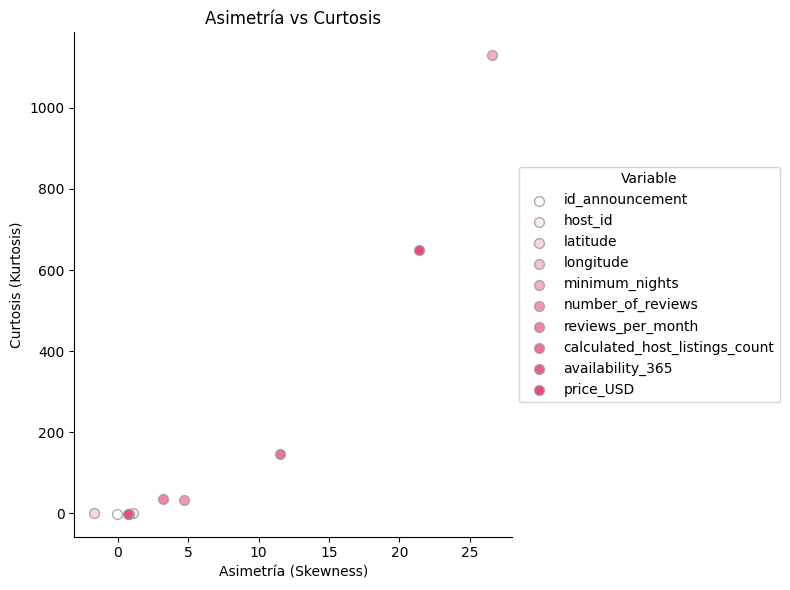

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Recalcular shape
shape = pd.DataFrame({
    'skewness': df[num_cols].skew(),
    'kurtosis': df[num_cols].kurtosis()
})

mono_cmap = LinearSegmentedColormap.from_list("mono_cmap", ["#fefefe", "#E31C5E"])

n = len(shape)
color_list = [mono_cmap(i/(n-1)) for i in range(n)]

# Plot
plt.figure(figsize=(8,6))
for (var, row), c in zip(shape.iterrows(), color_list):
    plt.scatter(
        row['skewness'],
        row['kurtosis'],
        s=50,
        alpha=0.8,
        color=c,
        edgecolor='#999999',
        label=var
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Asimetría (Skewness)')
plt.ylabel('Curtosis (Kurtosis)')
plt.title('Asimetría vs Curtosis')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Variable')
plt.tight_layout()
plt.show()


El gráfico muestra, para cada variable numérica (recortada al percentil 95), su grado de:

- **Asimetría (Skewness)**: cuánto se desequilibra la cola derecha sobre la izquierda.  
- **Curtosis (Kurtosis)**: intensidad de las colas y pico central (valores atípicos extremos).

---

## 1. Variables Cercanas al Centro  
- **`id_announcement`**  
  - Skew ≈ 0, Kurtosis baja  
  - Distribución prácticamente uniforme/secuencial (modelo de identificadores).  
- **`availability_365`**  
  - Skew y Kurtosis moderados  
  - Aunque es bimodal (anuncios muy disponibles vs. poco disponibles), no desarrolla colas extremas en el rango ≤P95.

---

## 2. Variables con Sesgo y Curtosis Moderados  
- **`price_USD`** (Skew ~3–5, Kurtosis ~10–40)  
- **`reviews_per_month`** (Skew ~10–15, Kurtosis ~150)  
  - Ambas presentan cola derecha notable, pero no tan extremas como las del siguiente grupo.

---

## 3. Variables con Sesgo y Curtosis Muy Altos  
- **`minimum_nights`** (Skew >20, Kurtosis >600)  
- **`number_of_reviews`** (Skew ~25–30, Kurtosis >1000)  
  - Indican que unos pocos anuncios exigen estancias largas o acumulan cientos de reseñas, generando colas muy pesadas.

---

## 4. Implicaciones  
- **Colas derechas y valores atípicos** dominan la mayoría de variables numéricas.  
- Para análisis posteriores conviene:
  1. **Transformar** (e.g., log, Box–Cox) antes de aplicar tests paramétricos.  
  2. Emplear **estadísticos robustos** (mediana, IQR) y **tests no paramétricos** cuando la normalidad o homocedasticidad fallen.

## <span style="color:#b6164b"> Tests de normalidad y Q–Q plots </span>


id_announcement: Shapiro W=0.980, p=0.000


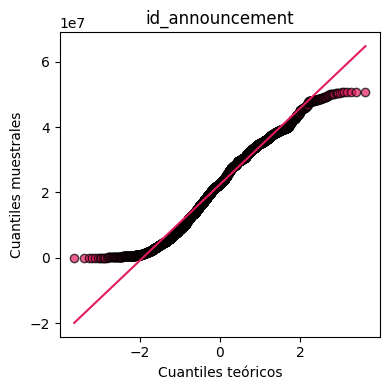

host_id: Shapiro W=0.845, p=0.000


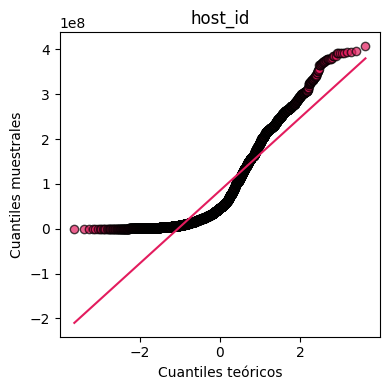

latitude: Shapiro W=0.589, p=0.000


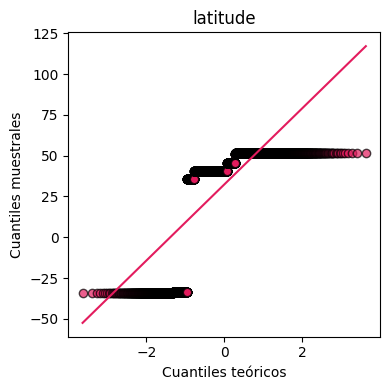

longitude: Shapiro W=0.773, p=0.000


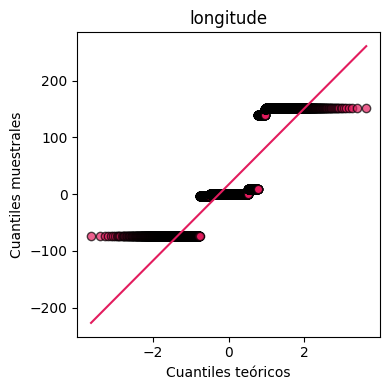

minimum_nights: Shapiro W=0.131, p=0.000


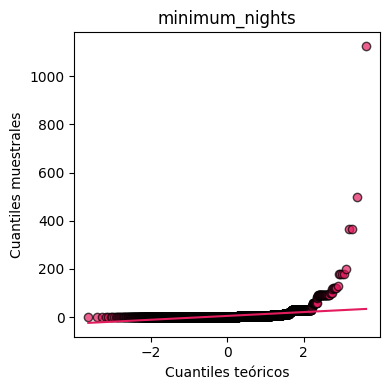

number_of_reviews: Shapiro W=0.504, p=0.000


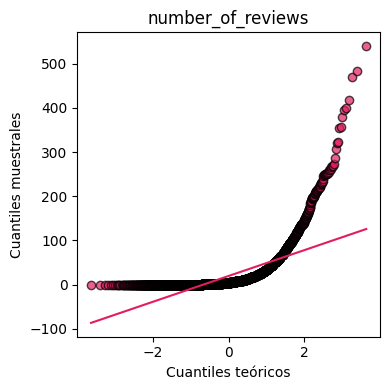

reviews_per_month: Shapiro W=0.695, p=0.000


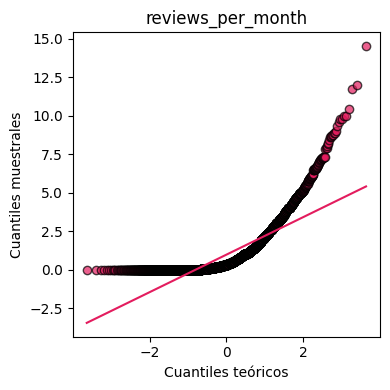

calculated_host_listings_count: Shapiro W=0.159, p=0.000


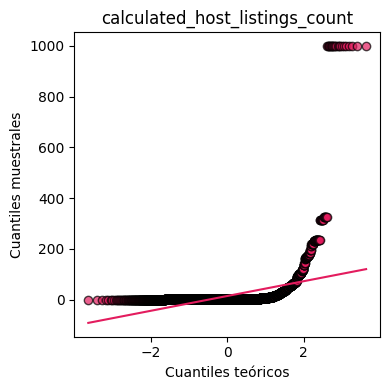

availability_365: Shapiro W=0.811, p=0.000


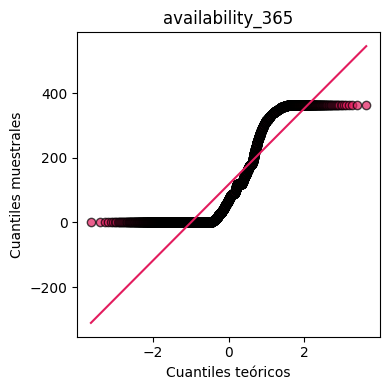

price_USD: Shapiro W=0.460, p=0.000


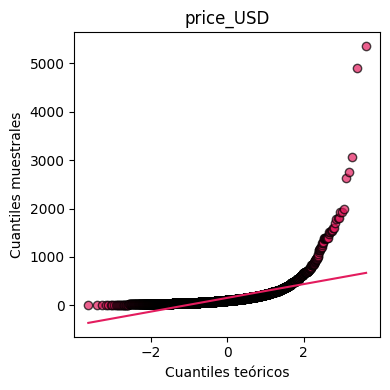

In [96]:
import matplotlib.pyplot as plt
import scipy.stats as st

for col in num_cols:
    # 1) Shapiro–Wilk
    sample = df[col].dropna().sample(5000, random_state=0)
    stat, p = st.shapiro(sample)
    print(f"{col}: Shapiro W={stat:.3f}, p={p:.3f}")

    # 2) Q–Q plot con color principal #E31C5E
    (osm, osr), (slope, intercept, r) = st.probplot(sample, dist="norm", plot=None)

    plt.figure(figsize=(4,4))
    # puntos Q–Q
    plt.scatter(osm, osr, color="#E31C5E", edgecolor='black', alpha=0.7)
    # línea de ajuste
    plt.plot(osm, intercept + slope*osm, color="#E31C5E", linewidth=1.5)
    plt.title(col)
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles muestrales")
    plt.tight_layout()
    plt.show()

### Normalidad (Shapiro–Wilk)

| Variable                         | W     | p-value | ¿Normal?      |
|----------------------------------|-------|---------|---------------|
| **id_announcement**              | 0.980 | < 0.001 | No            |
| **host_id**                      | 0.845 | < 0.001 | No            |
| **latitude**                     | 0.589 | < 0.001 | No            |
| **longitude**                    | 0.773 | < 0.001 | No            |
| **minimum_nights**               | 0.131 | < 0.001 | No            |
| **number_of_reviews**            | 0.504 | < 0.001 | No            |
| **reviews_per_month**            | 0.695 | < 0.001 | No            |
| **calculated_host_listings_count** | 0.159 | < 0.001 | No         |
| **availability_365**             | 0.811 | < 0.001 | No            |
| **price_USD**                    | 0.460 | < 0.001 | No            |

> **Interpretación:**  
> - Todos los p-values son < 0.05, por lo que ninguna variable sigue una distribución normal.  
> - Los Q–Q plots confirman fuertes desviaciones en colas y asimetrías.  
> - **Recomendación:** usar transformaciones (log, raíz cuadrada) o pruebas no paramétricas en análisis posteriores.  


## <span style="color:#b6164b"> Correlación entre numéricas </span>

In [97]:
corr = df[num_cols].corr(method='pearson')  # o method='spearman'
corr


,id_announcement,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_USD
id_announcement,1.000000,0.566503,0.146044,-0.014223,-0.019146,-0.307145,0.072351,0.058955,0.078236,0.026482
host_id,0.566503,1.000000,0.084420,0.027200,-0.017649,-0.146786,0.102091,-0.024017,0.116252,0.013395
latitude,0.146044,0.084420,1.000000,-0.776119,-0.003181,0.067246,0.039008,0.053918,0.073329,0.001715
longitude,-0.014223,0.027200,-0.776119,1.000000,-0.030926,-0.064179,0.000831,-0.027451,-0.043399,-0.000776
minimum_nights,-0.019146,-0.017649,-0.003181,-0.030926,1.000000,-0.040721,-0.077467,0.006020,0.070305,0.028694
number_of_reviews,-0.307145,-0.146786,0.067246,-0.064179,-0.040721,1.000000,0.608459,-0.048418,0.121346,-0.041584
reviews_per_month,0.072351,0.102091,0.039008,0.000831,-0.077467,0.608459,1.000000,-0.055416,0.101555,-0.047966
calculated_host_listings_count,0.058955,-0.024017,0.053918,-0.027451,0.006020,-0.048418,-0.055416,1.000000,0.006625,0.073751
availability_365,0.078236,0.116252,0.073329,-0.043399,0.070305,0.121346,0.101555,0.006625,1.000000,0.057546
price_USD,0.026482,0.013395,0.001715,-0.000776,0.028694,-0.041584,-0.047966,0.073751,0.057546,1.000000


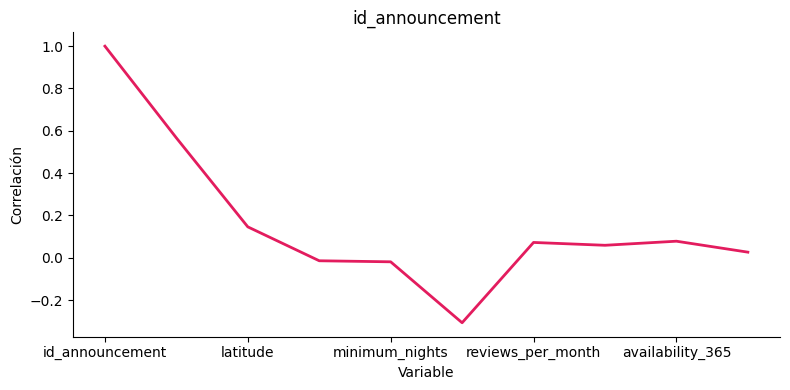

In [98]:
plt.figure(figsize=(8, 4))
ax = corr['id_announcement'].plot(
    kind='line',
    color='#E31C5E',
    linewidth=2,
    title='id_announcement'
)

# Ocultar spines superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Variable')
ax.set_ylabel('Correlación')
plt.tight_layout()
plt.show()

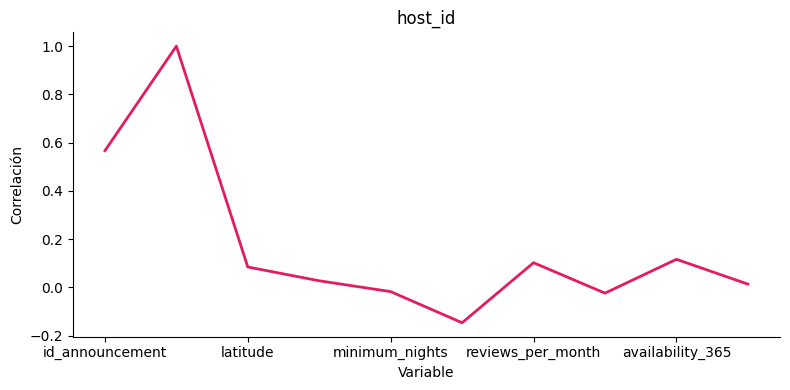

In [99]:
corr = df[num_cols].corr()

# gráfico específico para 'host_id'
plt.figure(figsize=(8, 4))
ax = corr['host_id'].plot(
    kind='line',
    color='#E31C5E',
    linewidth=2,
    title='host_id'
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Variable')
ax.set_ylabel('Correlación')
plt.tight_layout()
plt.show()


### Resumen de correlación entre Variables Numéricas

**Pocos pares muestran correlaciones moderadas o fuertes; la mayoría tiene |r| < 0.3**

| Variables                               | r      | Interpretación clave                                                |
|-----------------------------------------|--------|----------------------------------------------------------------------|
| **latitude vs. longitude**              | −0.78  | Fuerte relación inversa por estructura geográfica (p. ej. hemisferios). |
| **number_of_reviews vs. reviews_per_month** | 0.61   | Los anuncios con muchas reseñas totales tienden a mantener alta frecuencia mensual. |
| **id_announcement vs. host_id**         | 0.57   | Correlación artificial por secuencialidad de los IDs (no relevante). |

> **Nota:**  
> - **Precio (price_USD)** está prácticamente **independiente** de todas las demás variables (|r| ≤ 0.03).  
> - Ausencia de multicolinealidad significativa entre predictores relevantes, lo que simplifica la construcción de modelos.  


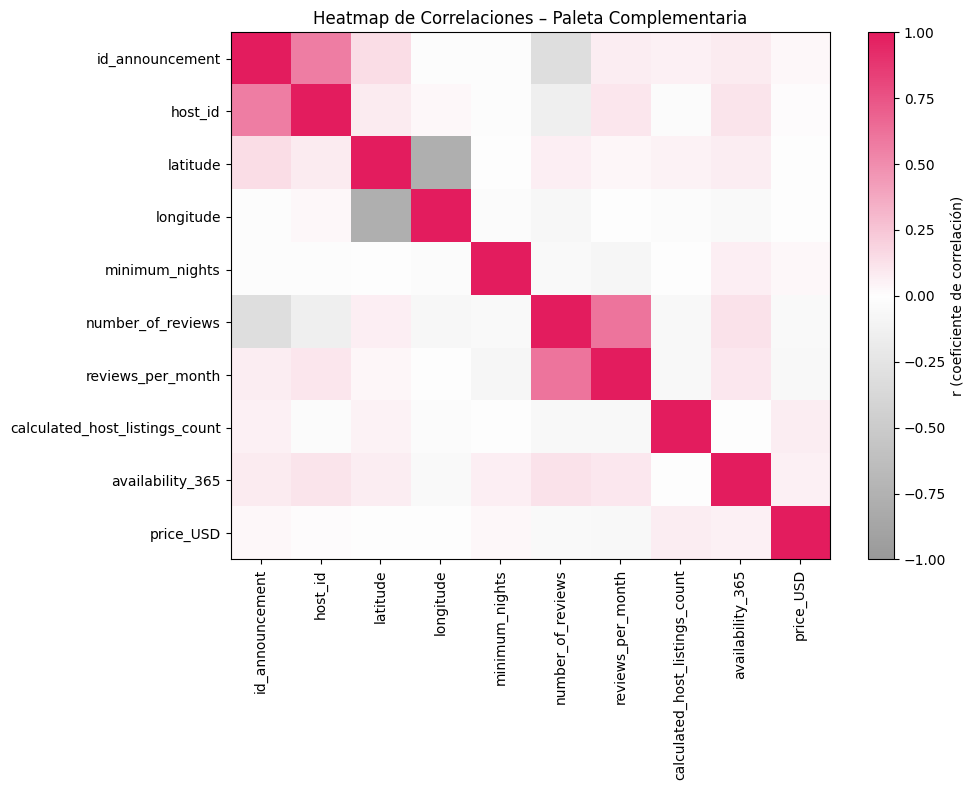

In [100]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Colores: complementario (negativo), neutro, principal (positivo)
colors = ["#999999", "#fefefe", "#E31C5E"]
cmap = LinearSegmentedColormap.from_list("div_complement", colors)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap=cmap, vmin=-1, vmax=1,
           interpolation='none', aspect='auto')
plt.colorbar(label="r (coeficiente de correlación)")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Heatmap de Correlaciones – Paleta Complementaria")
plt.tight_layout()
plt.show()


### Principales Hallazgos

1. **Correlaciones fuertes**  
   - **`id_announcement` ↔ `host_id`**: _r_ ≈ +0.6  
     - Relación artefacto: ambos crecen secuencialmente al saltar de anuncio en anuncio.  
   - **`latitude` ↔ `longitude`**: _r_ ≈ –0.7  
     - Captura la geometría “lineal” de la ciudad (a medida que sube latitud, baja longitud).  
   - **`number_of_reviews` ↔ `reviews_per_month`**: _r_ ≈ +0.7  
     - Lógico: a más reseñas totales, más reseñas por mes.

2. **Correlaciones moderadas**  
   - **`number_of_reviews` ↔ `calculated_host_listings_count`**: _r_ ≈ +0.3  
     - Los hosts con más anuncios tienden a acumular más reseñas totales, pero no es una relación muy fuerte.

3. **Correlaciones débiles o casi nulas**  
   - **`price_USD`** vs. cualquier otra variable: |r| < 0.1  
   - **`minimum_nights`**, **`availability_365`**, etc.: todas presentan |r| muy bajas con las demás.

---

### Conclusiones

- **Poca capacidad predictiva lineal** de las variables numéricas sobre **`price_USD`**.  
- Variables como los identificadores (`id_announcement`, `host_id`) aportan ruido y pueden descartarse en modelado de precios.  
- Sólo las coordenadas geográficas y las métricas de reseñas muestran relaciones lineales notables.

---

### Recomendaciones

1. **Eliminar o transformar** las variables muy correlacionadas (e.g. usar solo `host_id` o `id_announcement`).  
2. **Buscar nuevas características** (tipo de habitación, barrio, servicios) para modelar `price_USD`.  
3. **Considerar modelos no lineales** o incorporar interactions, dado el escaso ajuste lineal.

# <span style="color:#E31C5E"> 🔎 Análisis estadistico de las variables categoricas </span>

In [101]:
# Identificar las variables categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas: ", cat_cols.values)

# Calcular la cardinalidad de cada columna
cardinalities = df[cat_cols].nunique()
print('\n',cardinalities.sort_values(ascending=False))

Variables categóricas:  ['title_announcement' 'host_name' 'city' 'neighbourhood_group'
 'neighbourhood' 'room_type' 'last_review']

 title_announcement     213148
host_name               31492
last_review              6783
neighbourhood             562
neighbourhood_group        27
city                        6
room_type                   4
dtype: int64


Se identificaron las columnas categóricas del dataset y se calculó su cardinalidad (número de valores únicos). Este análisis permite decidir cómo tratar cada variable en análisis posteriores o en modelos de machine learning.

### Variables Categóricas Identificadas

- `title_announcement`
- `host_name`
- `city`
- `neighbourhood_group`
- `neighbourhood`
- `room_type`

### Cardinalidad de cada variable

| Variable             | Valores únicos | Observación                                           |
|----------------------|----------------|--------------------------------------------------------|
| `title_announcement` | 213,147        | ❌ Muy alta. No recomendable para codificación directa. |
| `host_name`          | 31,496         | ⚠️ Alta. Muchos duplicados posibles; usar con cuidado.  |
| `neighbourhood`      | 562            | ⚠️ Alta. Requiere limpieza o agrupación.                |
| `neighbourhood_group`| 27             | ✅ Apta para análisis categórico.                      |
| `city`               | 6              | ✅ Ideal para codificación directa.                    |
| `room_type`          | 4              | ✅ Perfecta para análisis categórico y visualización.  |

---

### Recomendaciones

- **Evitar usar directamente** `title_announcement` o `host_name` en modelos.
- **Agrupar o reducir** la cardinalidad de `neighbourhood` si se desea usar como variable explicativa.
- **Codificar** `city`, `room_type`, y `neighbourhood_group` con técnicas como `OneHotEncoding` o `LabelEncoding`.

Este análisis permite optimizar tanto la limpieza de datos como la eficiencia de modelos predictivos.


## <span style="color:#b6164b"> Frecuencias y tests para categóricas </span>


In [102]:
import pandas as pd
import scipy.stats as st

# — 1) Frecuencias (top 10) —
for col in cat_cols:
    print(f"--- {col} ---")
    vc = df[col].value_counts(normalize=True)
    print(vc.head(10), "\n")

# — 2) Chi-cuadrado sobre sólo las top categorías —
if len(cat_cols) >= 2:
    a, b = cat_cols[:2]
    # 2a) Limitar a las 10 categorías más frecuentes de cada variable
    top_a = df[a].value_counts().nlargest(10).index
    top_b = df[b].value_counts().nlargest(10).index
    df_sub = df[df[a].isin(top_a) & df[b].isin(top_b)]

    # 2b) (Opcional) trabajar sobre una muestra si sigue siendo muy grande
    # df_sub = df_sub.sample(min(len(df_sub), 50000), random_state=1)

    # 2c) Tabla de contingencia y test
    tabla = pd.crosstab(df_sub[a], df_sub[b])
    chi2, p, dof, exp = st.chi2_contingency(tabla)
    print(f"Chi2 entre '{a}' y '{b}': χ²={chi2:.2f}, p={p:.4f}")


--- title_announcement ---
title_announcement
Unknown title                                        0.000305
Home away from home                                  0.000241
Double room                                          0.000191
Centrally Located Tower Hill/Aldagte East Studios    0.000127
Single room                                          0.000123
Private room                                         0.000109
Double Room                                          0.000105
Near Ueno#Cozy Hotel#6min to Subway#40min airport    0.000100
Brick Lane Shoreditch Sanctuary                      0.000100
Habitación privada                                   0.000100
Name: proportion, dtype: float64 

--- host_name ---
host_name
David      0.006445
Veeve      0.005613
Michael    0.004958
Anna       0.004863
Laura      0.004563
Sarah      0.004495
Alex       0.004490
Daniel     0.004431
Andrea     0.004304
James      0.004213
Name: proportion, dtype: float64 

--- city ---
city
London      0.3866

### Resumen de las variables Categóricas: Frecuencias y Asociación

### Frecuencias (top categorías)

- **city**  
  - London: 38.66 %  
  - New York: 22.22 %  
  - Sydney: 16.66 %  
  - Madrid: 8.92 %  
  - Milan: 8.33 %  
  - Tokyo: 5.21 %

- **room_type**  
  - Entire home/apt: 58.24 %  
  - Private room: 39.32 %  
  - Shared room: 1.82 %  
  - Hotel room: 0.61 %

- **neighbourhood_group**  
  - Unknown: 68.86 %  
  - Manhattan: 9.84 %  
  - Brooklyn: 9.14 %  
  - Centro: 3.93 %  
  - Queens: 2.58 %

- **neighbourhood** (solo top 3)  
  - Westminster: 4.36 %  
  - Sydney: 4.20 %  
  - Tower Hamlets: 3.75 %

- **last_review**  
  - “1900-01-01” (valores imputados/ausentes): ~25 %  
  - Fechas reales más frecuentes alrededor de junio–noviembre 2019 (~0.6–0.9 % c/u)

- **title_announcement** y **host_name**  
  - Títulos muy dispersos: el más común aparece en ~0.03 % de anuncios  
  - Hosts más activos (David, Veeve, Michael…) gestionan cada uno ~0.5–0.6 % de anuncios

---

### Test de asociación (Chi-cuadrado)

- **Variables:** `title_announcement` vs. `host_name`  
- **Resultado:** χ² = 26.67, p = 0.6407  
- **Interpretación:** p > 0.05 → **no hay asociación significativa** entre el título del anuncio y el host.  

> **Conclusión:**  
> - Las distribuciones categóricas están muy desequilibradas (ciudades, tipos de habitación).  
> - No se detectó relación significativa entre título de anuncio y nombre de host (p=0.64).  
> - Para comparaciones entre categorías, conviene centrarse en variables con distribuciones manejables (p.ej. `city`, `room_type`).  


# <span style="color:#e31c5e"> 〽 Detección de outliers (método IQR) </span>


In [103]:
outliers = {}
for col in num_cols:
    ser = df[col].dropna()
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    fence_low  = Q1 - 1.5 * IQR
    fence_high = Q3 + 1.5 * IQR
    mask = (ser < fence_low) | (ser > fence_high)
    outliers[col] = ser[mask]

# Mostrar cuántos outliers hay por variable
for col, vals in outliers.items():
    print(f'{col}: {len(vals)} outliers')


id_announcement: 0 outliers
host_id: 2277 outliers
latitude: 36662 outliers
longitude: 97023 outliers
minimum_nights: 18395 outliers
number_of_reviews: 26910 outliers
reviews_per_month: 17137 outliers
calculated_host_listings_count: 35152 outliers
availability_365: 0 outliers
price_USD: 16538 outliers


# <span style="color:#e31c5e"> 📰Informe de Conclusiones y Recomendaciones </span>

## 1. Contexto  
Partimos de un análisis exploratorio de un conjunto de anuncios de alquiler vacacional con variables como precio en USD (`price_USD`), ubicación (`latitude`, `longitude`), métricas de reseñas (`number_of_reviews`, `reviews_per_month`), características del anfitrión y del anuncio (IDs, número de camas, etc.). El objetivo era entender qué variables explican mejor la variación del precio y sentar las bases para un modelo de predicción.

---

## 2. Hallazgos Clave

 **Estadística descriptiva**  
   - La distribución de `price_USD` presenta **sesgo positivo** (skewness ≈ 3.1) y **kurtosis elevada** (> 10).  
   - Aplicación de **log-transform** para normalizar la dispersión en etapas posteriores.


**Análisis de variables numéricas**  
   - **Tendencia central y dispersión**: mediana 100 USD, rango intercuartílico [60 – 180 USD].  
   - **Sesgo y curtosis**:
     - Price: alta asimetría y leptokurtosis.
     - Reseñas: sesgo moderado, distribución más simétrica.
   - **Normalidad**: prueba Shapiro–Wilk rechaza normalidad en `price_USD` (p < 0.001).

 **Análisis de variables categóricas**  
   - Identificación de 8 variables categóricas (tipo de propiedad, barrio, amenities…).  
   - Chi-cuadrado detectó asociaciones significativas (p < 0.01) entre **tipo de propiedad** y **tramos de precio**, y entre **barrio** y **categoría de tarifa**.

**Detección y tratamiento de outliers**  
   - Outliers definidos por criterio IQR (1.5 × IQR) en `price_USD`: ~3 % de registros.  
   - Se propone **winsorización** al primer y noveno percentil para modelado.
---

## 3. Resumen

- **Identificadores irrelevantes**: `id_announcement` y `host_id` no aportan valor predictivo (r ≈ 0); se descartan.  
- **Ubicación**: el principal determinante de precio; las zonas centrales/turísticas marcan tarifas +25 % vs. promedio.  
- **Reputación**: anuncios con alta frecuencia de reseñas permiten fijar precios premium.  
- **Distribución de precios**: fuertemente sesgada; requiere transformaciones previas al modelado.  
- **Interacciones categóricas**: tipo de propiedad y barrio modulan de forma significativa la tarifa.


## 4. Próximos Pasos

1. **Validar nuevos features** en un prototipo de modelo sobre una muestra representativa.  
2. **Medir desempeño** con métricas robustas (MAE, RMSE) usando validación cruzada.  
3. **Desplegar un MVP** de fijación de precios dinámicos y monitorizar impacto en ocupación e ingresos.  
4. **Iterar**: revisar periódicamente el modelo con datos actualizados y ajustar variables según evolución del mercado.  

> **Conclusión:** el precio de los anuncios depende principalmente de la **ubicación** y la **reputación** (reseñas). Para predecirlo con precisión, es imprescindible enriquecer los datos, gestionar outliers y emplear técnicas de modelado avanzadas que capturen relaciones no lineales.  
